<a href="https://colab.research.google.com/github/Aimerlee123/Python-TeamProject/blob/aimerlee/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%ED%8C%80_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [19]:
bike=pd.read_csv('/content/drive/MyDrive/data/bicycletimeuse.csv',encoding='cp949')
bike.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2022-12-01,0,746,746. 목동2단지 상가,정기권,NaN,~10대,1,13.54,0.13,570.00,3
1,2022-12-01,0,1653,1653. 노원역1번출구,정기권,NaN,~10대,1,32.81,0.36,1534.33,12
2,2022-12-01,0,1974,1974. 신도림2차e편한세상아파트 203동 앞,정기권,NaN,~10대,1,19.10,0.17,720.00,4
3,2022-12-01,0,1355,1355. 보문2교,정기권,NaN,~10대,1,10.57,0.08,333.59,3
4,2022-12-01,0,1184,1184. 마곡13단지,정기권,NaN,~10대,1,6.93,0.07,318.20,37


In [4]:
bike['연령대코드']=bike['연령대코드'].str.replace('~',"")

In [5]:
bike_1 = bike.copy()
bike_1["대여일자"] = pd.to_datetime(bike_1["대여일자"], infer_datetime_format=True)
bike_1['요일'] = bike_1['대여일자'].dt.day_name()
bike_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638969 entries, 0 to 1638968
Data columns (total 13 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   대여일자     1638969 non-null  datetime64[ns]
 1   대여시간     1638969 non-null  int64         
 2   대여소번호    1638969 non-null  int64         
 3   대여소명     1638969 non-null  object        
 4   대여구분코드   1638969 non-null  object        
 5   성별       1112717 non-null  object        
 6   연령대코드    1638969 non-null  object        
 7   이용건수     1638969 non-null  int64         
 8   운동량      1638969 non-null  object        
 9   탄소량      1638969 non-null  object        
 10  이동거리(M)  1638969 non-null  float64       
 11  이용시간(분)  1638969 non-null  int64         
 12  요일       1638969 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memory usage: 162.6+ MB


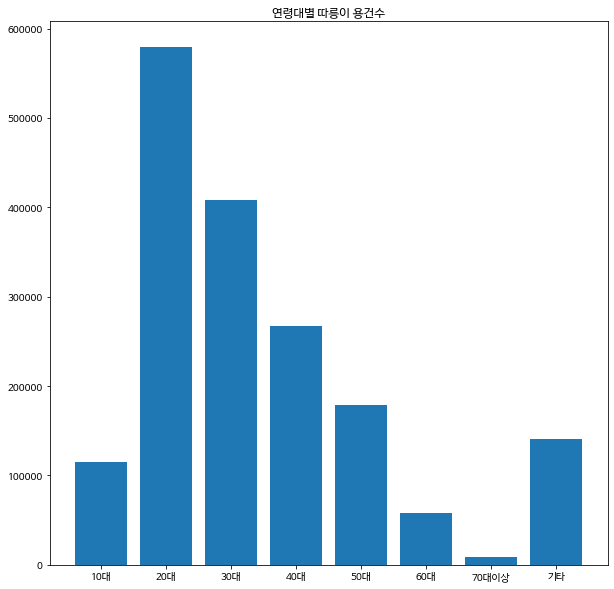

In [6]:
age_group=bike_1.groupby(by=["연령대코드"],as_index=False)
age_sum=age_group["이용건수"].sum()
plt.figure(figsize=(10,10))
plt.title("연령대별 따릉이 사용건수")
plt.bar(age_sum['연령대코드'],age_sum['이용건수'])
plt.show()

In [14]:
bike_2=bike.copy()
bike_2.dropna(subset=['성별'],inplace=True)
bike_2['성별']=bike_2['성별'].str.replace('f','F')
bike_2['성별']=bike_2['성별'].str.replace('m','M')


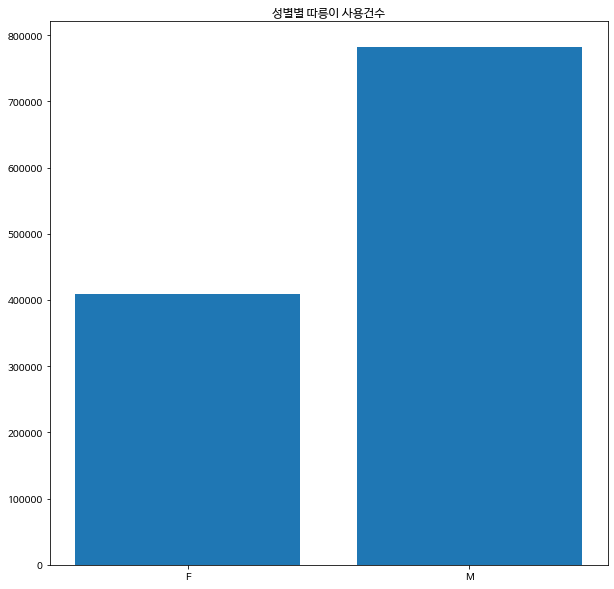

In [22]:
sex_group=bike_2.groupby(["성별"],as_index=False)
sex_sum=sex_group["이용건수"].sum()
plt.figure(figsize=(10,10))
plt.title("성별별 따릉이 사용건수")
plt.bar(sex_sum['성별'],sex_sum['이용건수'])
plt.show()

In [74]:
bike_2.groupby('성별').agg({'이동거리(M)':['min','max','mean'],'이용시간(분)':['min','max','mean']})

이동거리(M)                        이용시간(분)                 
       min       max         mean     min   max       mean
성별                                                        
F      0.0  93230.98  1916.147624       0  1024  19.391378
M      0.0  92748.64  2054.716033       0   948  18.625522

In [73]:
df1=bike_2.groupby(['대여구분코드','성별'],as_index=False)['이용건수'].sum()
df1

,대여구분코드,성별,이용건수
0,단체권,F,1620
1,단체권,M,3298
2,일일권,F,40954
3,일일권,M,83848
4,일일권(비회원),F,32
5,일일권(비회원),M,52
6,정기권,F,366777
7,정기권,M,694793


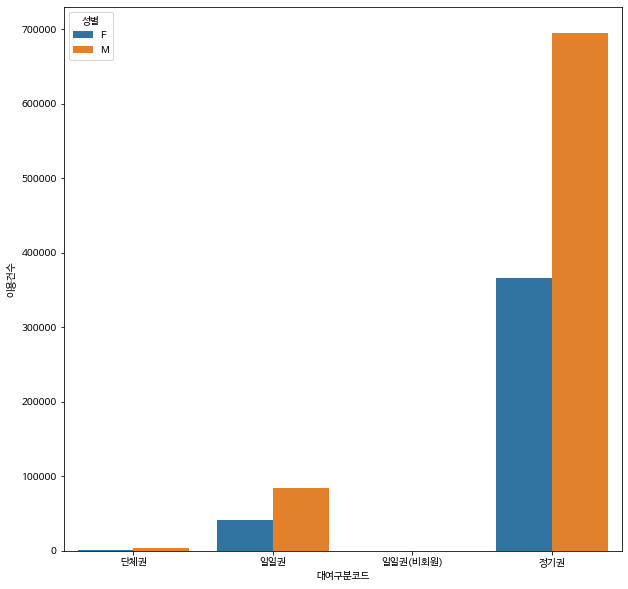

In [69]:
plt.figure(figsize=(10,10))
sns.barplot(x='대여구분코드', y='이용건수', hue='성별',data=df1 )

In [76]:
df2=bike_2.groupby(['연령대코드','성별'],as_index=False)['이용건수'].sum()
df2

,연령대코드,성별,이용건수
0,10대,F,24817
1,10대,M,74949
2,20대,F,137356
3,20대,M,203929
4,30대,F,94581
5,30대,M,181504
6,40대,F,60884
7,40대,M,130527
8,50대,F,41012
9,50대,M,84696


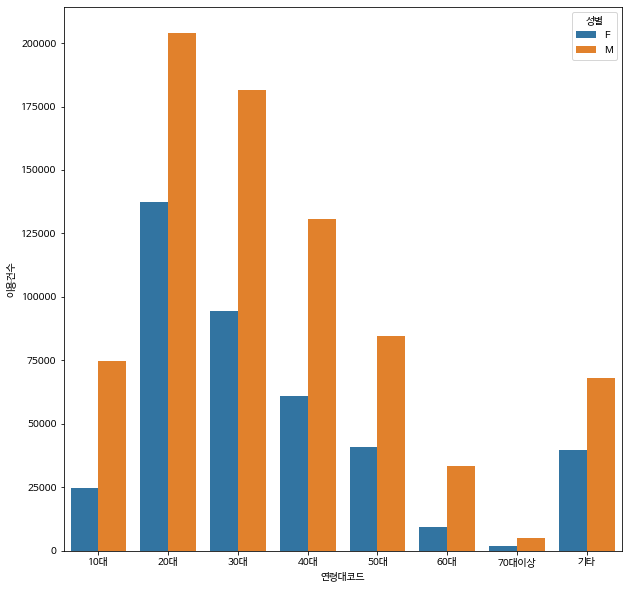

In [78]:
plt.figure(figsize=(10,10))
sns.barplot(x='연령대코드', y='이용건수', hue='성별',data=df2 )

In [99]:
df3=bike_2.groupby('대여소번호',as_index=False)['이용건수'].sum()
df3.set_index('대여소번호',inplace=True)

In [100]:
df3.sort_values('이용건수')

,이용건수
대여소번호,
11,2
5767,3
3725,3
4322,4
3527,4
...,...
1153,3194
1210,3253
2728,3375
